In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-enrolment/Enrolment Analyst Data.xlsx


## Data Loading and Inspection

In [2]:
df = pd.read_excel('../input/student-enrolment/Enrolment Analyst Data.xlsx')

In [3]:
df.head()

,Admit Term,Residency,Visa Type,Citizenship,Faculty,Program,Major,Application Type,High school Nation,High school City,Admitted,Registered
0,202109,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,CU - Canadian University,Canada,Parksville,NaN,NaN
1,202109,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,CU - Canadian University,Canada,Nanaimo,NaN,NaN
2,202109,International,Study Permit,India,BU,BU-BCOM,Undeclared,B3 - BC College,India,Mumbai,NaN,NaN
3,202109,Domestic,Permanent Resident,United Kingdom,BU,BU-BCOM,Undeclared,B2 - BC/Yukon High School Graduate,Canada,North Vancouver,Y,Y
4,202109,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,C2 - Out of Prov High School Grad,Canada,Calgary,NaN,NaN


In [4]:
df.shape

(12422, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12422 entries, 0 to 12421
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Admit Term          12422 non-null  int64 
 1   Residency           12422 non-null  object
 2   Visa Type           12422 non-null  object
 3   Citizenship         12422 non-null  object
 4   Faculty             12422 non-null  object
 5   Program             12422 non-null  object
 6   Major               12422 non-null  object
 7   Application Type    12422 non-null  object
 8   High school Nation  12422 non-null  object
 9   High school City    12422 non-null  object
 10  Admitted            6916 non-null   object
 11  Registered          1191 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


A total of 12,422 applications were received between 2021 and 2024. 6,916 applicants were admitted and only 1,191 students registered.

In [6]:
# Standardizing the datetime format
df['Admit Term'] = df['Admit Term'].astype(str).str[:4]
df['Admit Term'] = pd.to_datetime(df['Admit Term'])

# Extract year from the date column
df['Admit Term'] = df['Admit Term'].dt.year

In [7]:
df.reset_index(drop=True, inplace=True)

# df.set_index('Admit Term', inplace=True)

In [8]:
missing_values = df.isnull().sum()
missing_values

Admit Term                0
Residency                 0
Visa Type                 0
Citizenship               0
Faculty                   0
Program                   0
Major                     0
Application Type          0
High school Nation        0
High school City          0
Admitted               5506
Registered            11231
dtype: int64

In [9]:
# Replace 'NaN' values with 0
df['Admitted'].fillna(0, inplace=True)
df['Registered'].fillna(0, inplace=True)

# Replace 'Y' values with 1
df['Admitted'].replace('Y', 1, inplace=True)
df['Registered'].replace('Y', 1, inplace=True)

/tmp/ipykernel_18/2349962185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Admitted'].fillna(0, inplace=True)
/tmp/ipykernel_18/2349962185.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [10]:
df.head()

,Admit Term,Residency,Visa Type,Citizenship,Faculty,Program,Major,Application Type,High school Nation,High school City,Admitted,Registered
0,2021,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,CU - Canadian University,Canada,Parksville,0,0
1,2021,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,CU - Canadian University,Canada,Nanaimo,0,0
2,2021,International,Study Permit,India,BU,BU-BCOM,Undeclared,B3 - BC College,India,Mumbai,0,0
3,2021,Domestic,Permanent Resident,United Kingdom,BU,BU-BCOM,Undeclared,B2 - BC/Yukon High School Graduate,Canada,North Vancouver,1,1
4,2021,International,Study Permit,People's Republic of China,BU,BU-BCOM,Undeclared,C2 - Out of Prov High School Grad,Canada,Calgary,0,0


## Exploratory Data Analysis (EDA)

Let's examine the distribution of admissions and registrations over the past three years

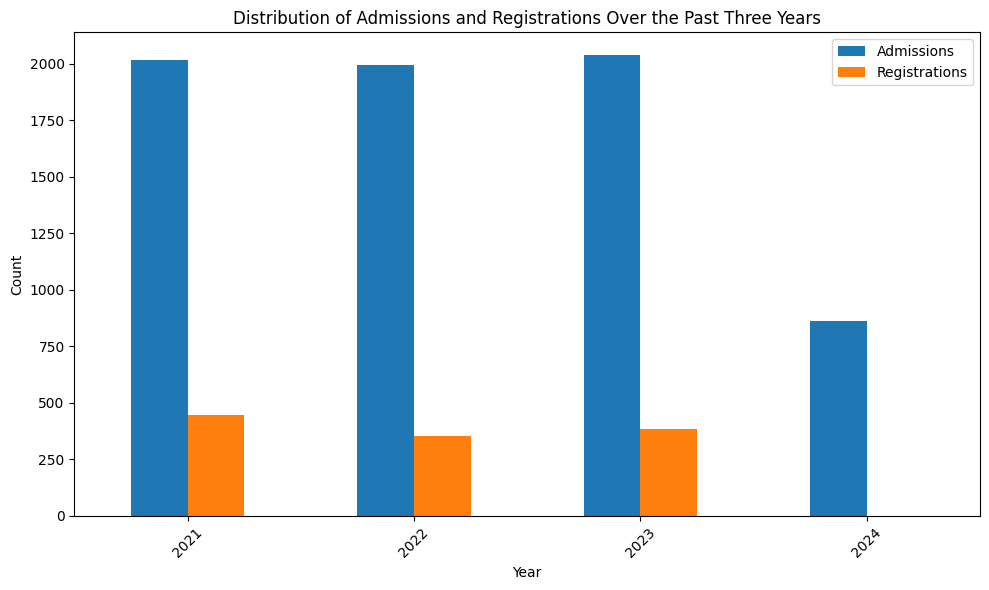

In [11]:
# Filter data for the past three years
current_year = pd.Timestamp.now().year
three_years_ago = current_year - 3
filtered_df = df[df['Admit Term'] >= three_years_ago]

# Group by admission term and count admissions and registrations
admissions_registrations = filtered_df.groupby(filtered_df['Admit Term'])[['Admitted', 'Registered']].sum()

# Plot distribution of admissions and registrations over the past three years
admissions_registrations.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Admissions and Registrations Over the Past Three Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Admissions', 'Registrations'])
plt.tight_layout()
plt.show()

In each year the number of admitted students on the average quadruples the number of students who register for the past 3 years.

### Applicants Distribution

Now let's examine the distribution of applicants based on Application Type, Citizenship, Visa Type, and Residency.

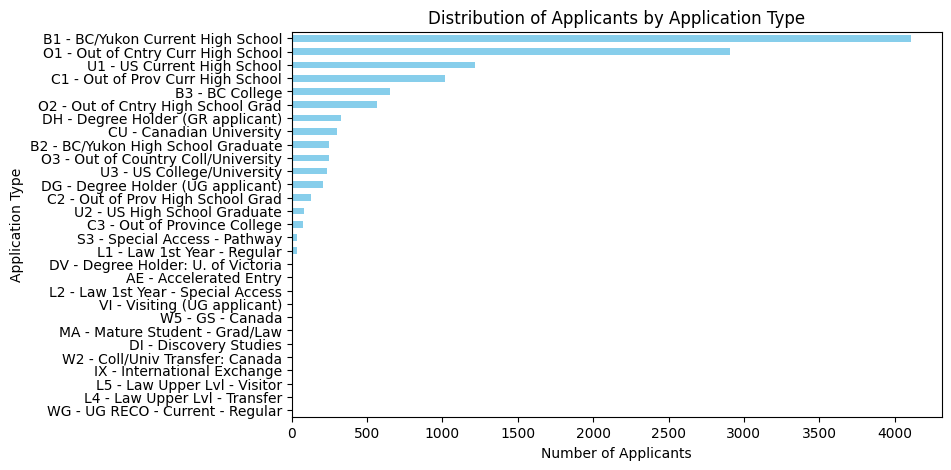

In [12]:
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution of applicants based on residency
# sns.countplot(x='Residency', data=df, ax=axes[0])
# axes[0].set_title('Distribution of Applicants by Residency')

# Count the number of applicants for each application type
applicant_counts = df['Application Type'].value_counts()

# Sort the applicant counts in descending order
applicant_counts = applicant_counts.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
ax = applicant_counts.plot(kind='barh', color='skyblue')
ax.set_title('Distribution of Applicants by Application Type')
ax.set_xlabel('Number of Applicants')
ax.set_ylabel('Application Type')

# Adjust the alignment of the y-axis labels to each bar
plt.subplots_adjust(left=0.25)

plt.show()

Based on the above plot, majority of applicants the BC provincial high school graduates followed by high school graduates from other countries apart from the Unites States.

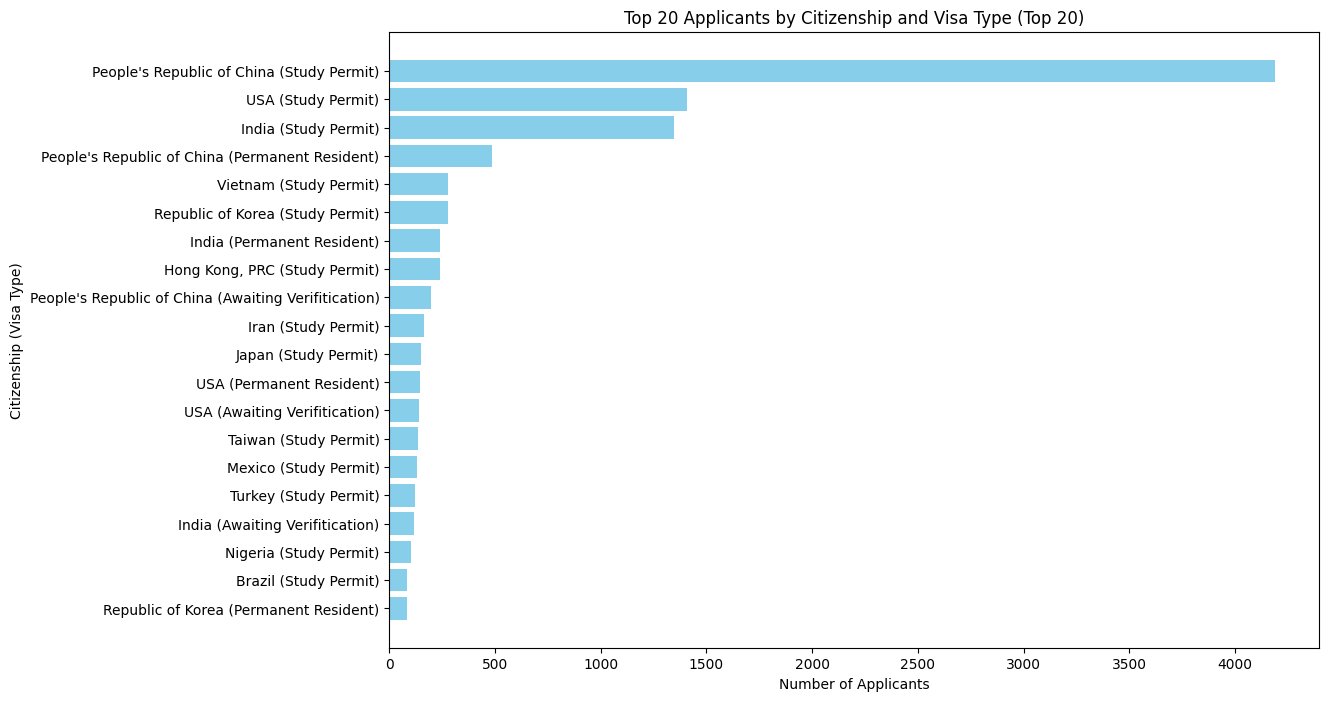

In [13]:
# Group by citizenship and visa type, then count the number of applicants for each combination
applicant_counts = df.groupby(['Citizenship', 'Visa Type']).size().reset_index(name='Applicants')

# Sort the top 20 applicant counts in descending order
applicant_counts = applicant_counts.sort_values(by='Applicants', ascending=False).head(20)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(applicant_counts['Citizenship'] + ' (' + applicant_counts['Visa Type'] + ')', applicant_counts['Applicants'], color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Citizenship (Visa Type)')
plt.title('Top 20 Applicants by Citizenship and Visa Type (Top 20)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

Applicants from China accounts for triple the applicants from every other country. Overall, over 80% of applicants have a study permit, hence, are international

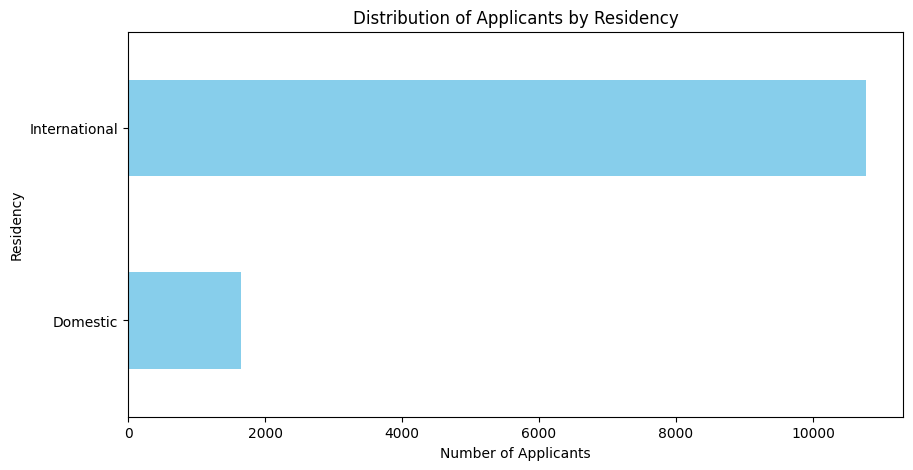

In [14]:
# Count the number of applicants for each residency
residency_counts = df['Residency'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
residency_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Residency')
plt.title('Distribution of Applicants by Residency')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

## Data Visualizations

### Admission and Registration Rates

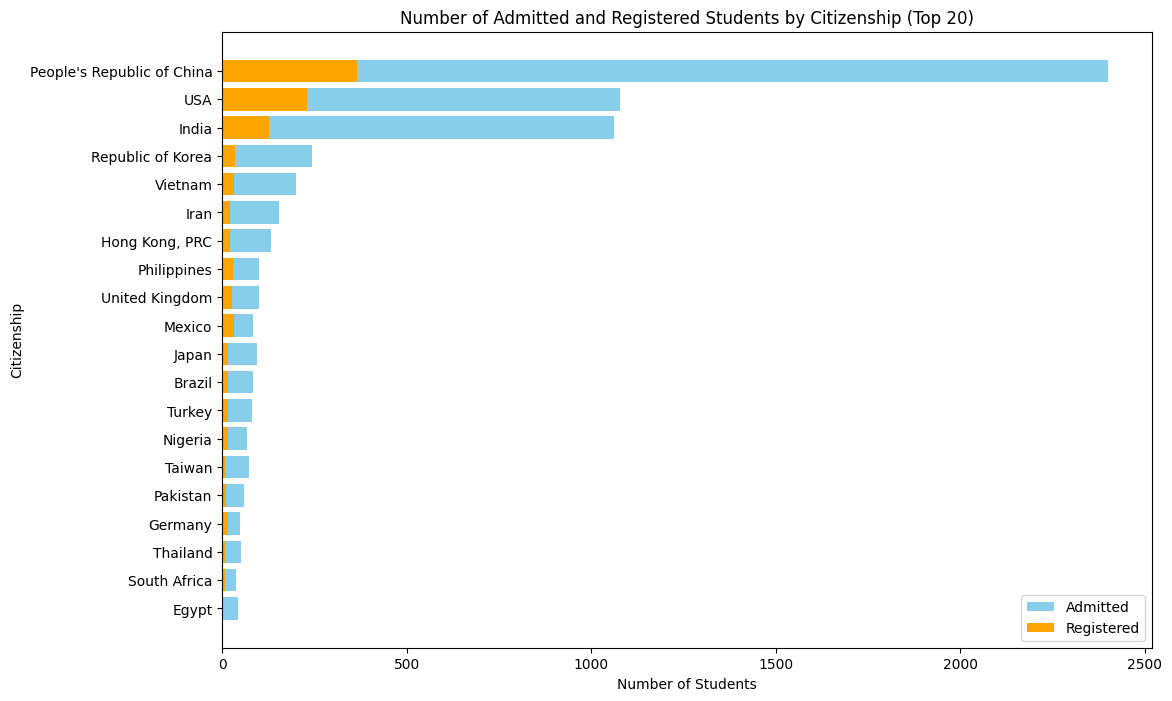

In [15]:
citizenship_counts = df.groupby('Citizenship')[['Admitted', 'Registered']].sum().reset_index()

citizenship_counts['Total'] = citizenship_counts['Admitted'] + citizenship_counts['Registered']
citizenship_counts = citizenship_counts.sort_values(by='Total', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(citizenship_counts['Citizenship'], citizenship_counts['Admitted'], color='skyblue', label='Admitted')
plt.barh(citizenship_counts['Citizenship'], citizenship_counts['Registered'], color='orange', label='Registered')
plt.xlabel('Number of Students')
plt.ylabel('Citizenship')
plt.title('Number of Admitted and Registered Students by Citizenship (Top 20)')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

Around 15 to 20% of admitted admitted students on the average register, except in Mexico with nearly 50%.

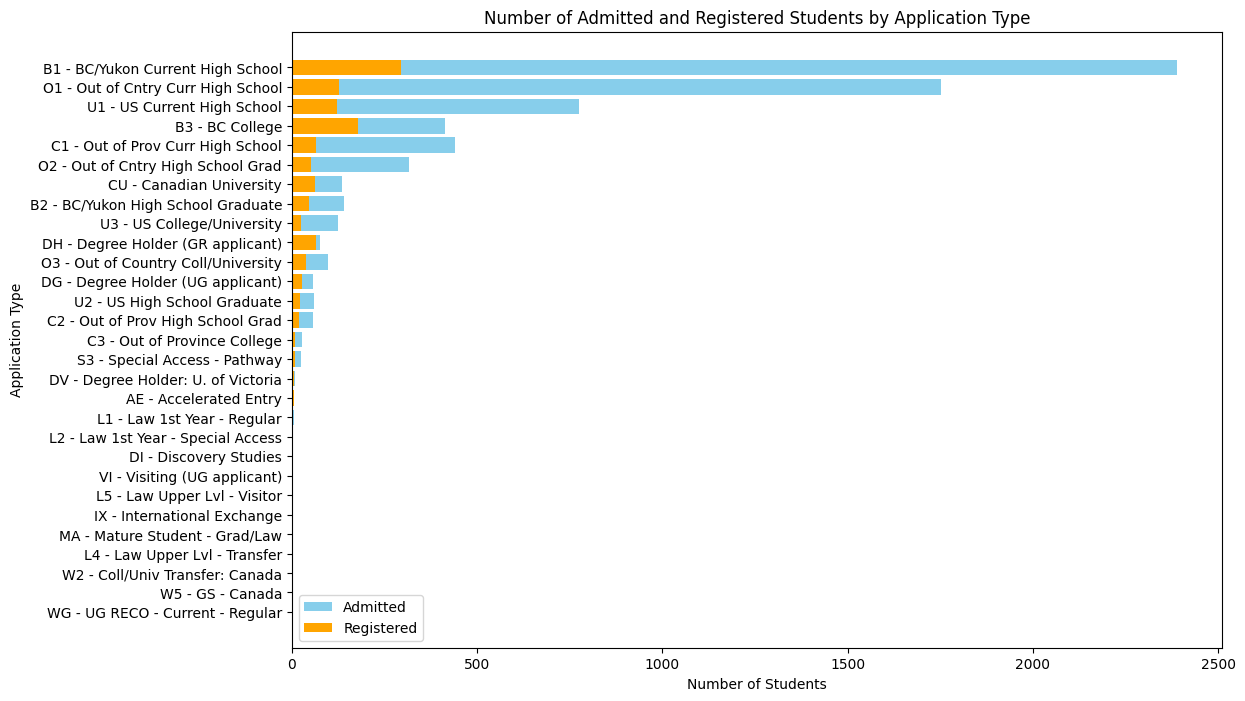

In [16]:
application_counts = df.groupby('Application Type')[['Admitted', 'Registered']].sum().reset_index()

application_counts['Total'] = application_counts['Admitted'] + application_counts['Registered']
application_counts = application_counts.sort_values(by='Total', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(application_counts['Application Type'], application_counts['Admitted'], color='skyblue', label='Admitted')
plt.barh(application_counts['Application Type'], application_counts['Registered'], color='orange', label='Registered')
plt.xlabel('Number of Students')
plt.ylabel('Application Type')
plt.title('Number of Admitted and Registered Students by Application Type')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

More than 80% of degree holders that are GR applicants registered upon admission, while about 50% of UG degree holders and canadian university graduates are registered after being admitted. 50% of graduates from BC college also register upon admission. Less than 20% of the University or college graduates from the US are registered. Overall, less than 25% of high school graduates local or international (including US) register after being admitted.


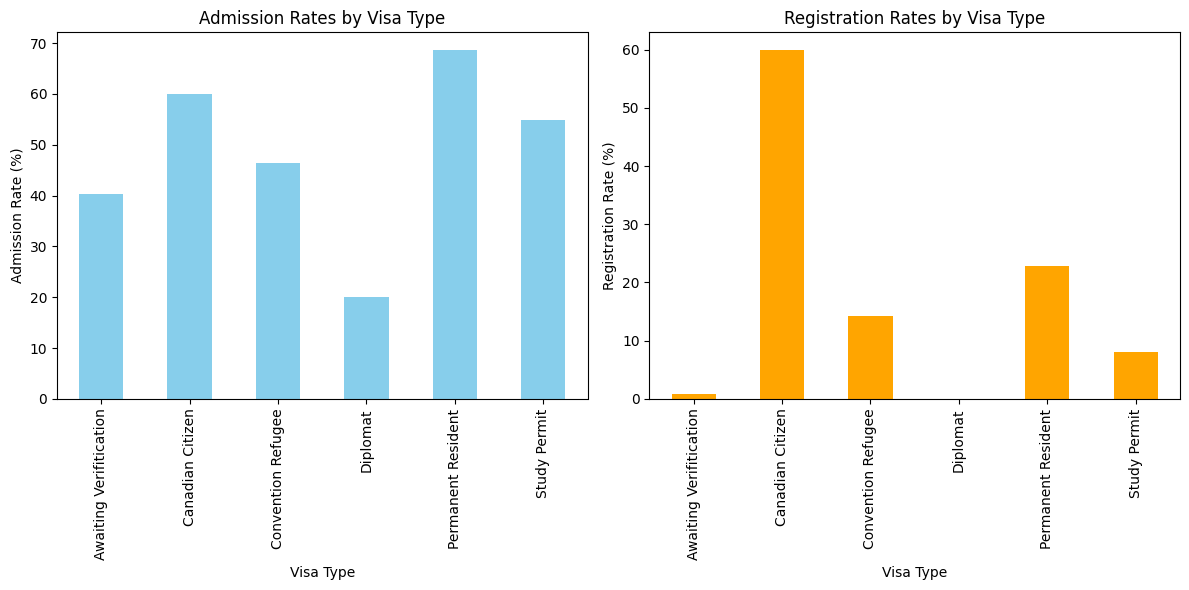

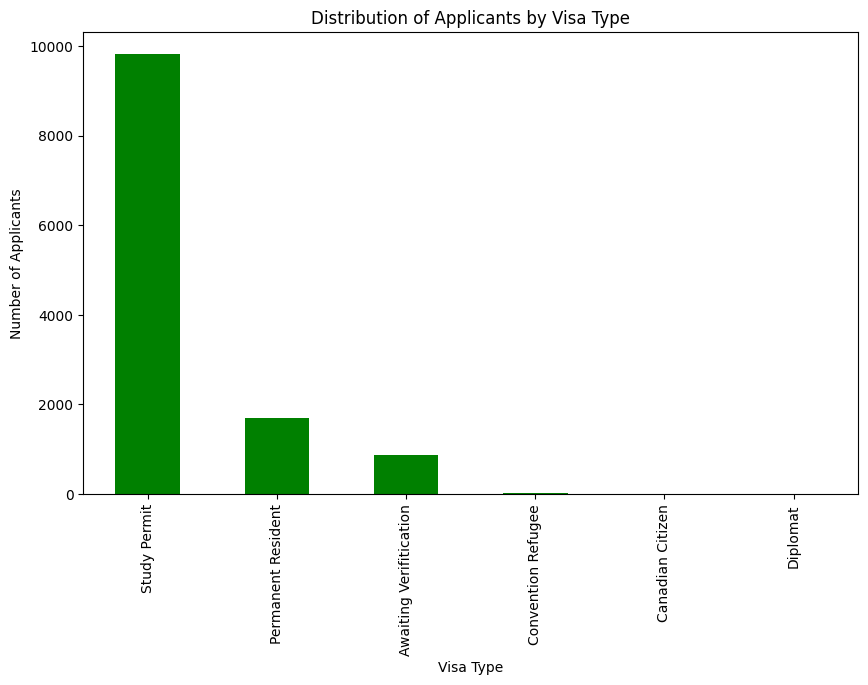

In [17]:
# Calculate admission rates by Visa Type
admission_rates = df.groupby('Visa Type')['Admitted'].mean() * 100

# Calculate registration rates by Visa Type
registration_rates = df.groupby('Visa Type')['Registered'].mean() * 100

# Plot admission rates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
admission_rates.plot(kind='bar', color='skyblue')
plt.title('Admission Rates by Visa Type')
plt.xlabel('Visa Type')
plt.ylabel('Admission Rate (%)')

# Plot registration rates
plt.subplot(1, 2, 2)
registration_rates.plot(kind='bar', color='orange')
plt.title('Registration Rates by Visa Type')
plt.xlabel('Visa Type')
plt.ylabel('Registration Rate (%)')

plt.tight_layout()
plt.show()

# Visualize distribution of applicants by Visa Type
plt.figure(figsize=(10, 6))
df['Visa Type'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Applicants by Visa Type')
plt.xlabel('Visa Type')
plt.ylabel('Number of Applicants')
plt.show()

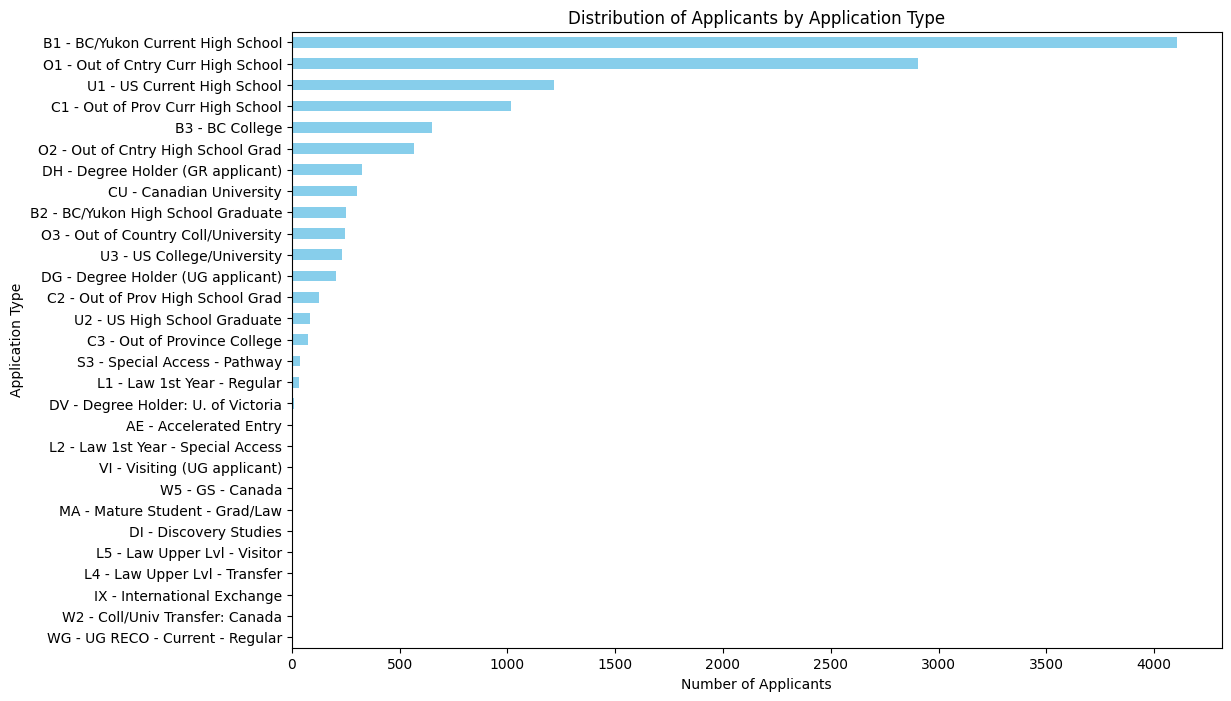

                                     Admission Rate  Registration Rate  \
Application Type                                                         
B1 - BC/Yukon Current High School          0.581792           0.072055   
O1 - Out of Cntry Curr High School         0.603235           0.043703   
U1 - US Current High School                0.637562           0.100494   
C1 - Out of Prov Curr High School          0.431796           0.063788   
B3 - BC College                            0.637904           0.274268   
O2 - Out of Cntry High School Grad         0.561062           0.090265   
DH - Degree Holder (GR applicant)          0.230769           0.203077   
CU - Canadian University                   0.447020           0.211921   
B2 - BC/Yukon High School Graduate         0.560000           0.184000   
O3 - Out of Country Coll/University        0.400000           0.155102   
U3 - US College/University                 0.529915           0.111111   
DG - Degree Holder (UG applicant)     

In [18]:
# Calculate admission rates for each application type
admission_rates = df.groupby('Application Type')['Admitted'].mean()

# Calculate registration rates for each application type
registration_rates = df.groupby('Application Type')['Registered'].mean()

# Calculate distribution of applicants by application type
applicant_distribution = df['Application Type'].value_counts()

# Combine the summary statistics into a single DataFrame
summary_stats = pd.DataFrame({
    'Admission Rate': admission_rates,
    'Registration Rate': registration_rates,
    'Applicant Count': applicant_distribution
}).sort_values(by='Applicant Count', ascending=False)

# Create a horizontal bar plot for the distribution of applicants by application type
plt.figure(figsize=(12, 8))
summary_stats['Applicant Count'].plot(kind='barh', color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Application Type')
plt.title('Distribution of Applicants by Application Type')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

# Print summary statistics
print(summary_stats)

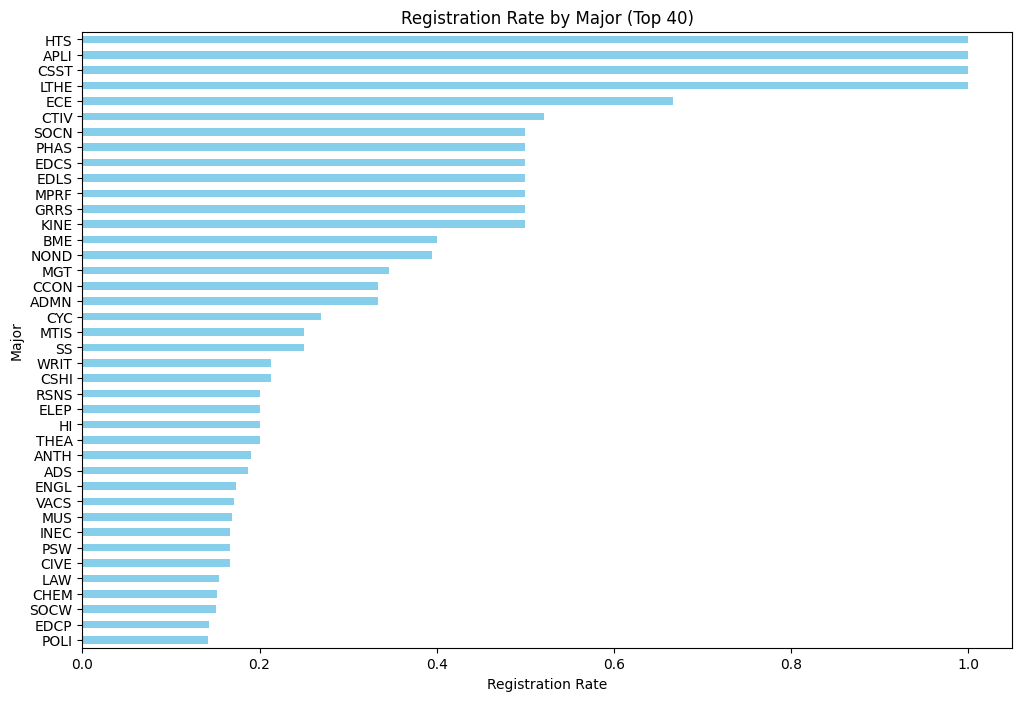

In [19]:
# Calculate registration rate for each major
registration_rate_by_major = df.groupby('Major')['Registered'].mean()

# Sort majors by registration rate in descending order
sorted_registration_rate = registration_rate_by_major.sort_values(ascending=False)

# Select top 20 majors
top_20_majors = sorted_registration_rate.head(40)

plt.figure(figsize=(12, 8))
top_20_majors.plot(kind='barh', color='skyblue')
plt.xlabel('Registration Rate')
plt.ylabel('Major')
plt.title('Registration Rate by Major (Top 40)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest registration rate at the top
plt.show()

## Conclusion

In summary, future international recruitment efforts should focus on regions and countries with high application rates, while also considering registration rates and specific applicant characteristics. By targeting efforts where there is both a high volume of applicants and potential for increased registration rates, UVic can maximize its recruitment success and ensure a diverse and vibrant student body.

In [20]:
df.to_excel('Enrolment_Data_Processsed.xlsx')

